In [1]:
import numpy as np
from tqdm import tqdm

def convolution2d(image, kernel, bias):
    m, n = kernel.shape
    if (m == n):
        y, x = image.shape
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel) + bias
    return new_image

In [2]:
np.random.seed(1)
image=np.random.randint(5,size=(4,5))
#kernel=np.array([[0,10,0],[0,10,0],[0,10,0]])
#kernel=np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
kernel=np.array([[-1, 0, 1], [0, 0, 0], [1, 0, -1]])
bias=0
#bias=np.random.randint(5)
print(image)
print(kernel)
print(bias)

[[3 4 0 1 3]
 [0 0 1 4 4]
 [1 2 4 2 4]
 [3 4 2 4 2]]
[[-1  0  1]
 [ 0  0  0]
 [ 1  0 -1]]
0


## 實作padding='same' (convoution之後大小和原圖一樣)

In [3]:
def plot_image(image1,image2):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8)) 
    ax1.imshow(image1, cmap=plt.cm.gray) 
    ax2.imshow(image2, cmap=plt.cm.gray) 
    ax1.set_title('image1')
    ax1.set_title('image2')
    plt.show()

def convolution2d_(image, kernel, bias):
    m, n = kernel.shape
    if (m == n):
        
        image_pad = np.zeros((image.shape[0]+2,image.shape[1]+2))
        image_pad[1:-1,1:-1]= image[:,:]
        y, x = image_pad.shape
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros_like(image)
        for i in tqdm(range(y)):
            for j in range(x):
                new_image[i][j] = np.sum(image_pad[i:i+m, j:j+m]*kernel) + bias
    return new_image

## 將image 載入一張圖進行convlution, 並繪出convlution之後的圖

In [4]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def create_array(image_path):
	
	image = Image.open(image_path).convert('L')  #l: convert to gray
	image_array = np.asarray(image) #,dtype=float)
	print(image_array.shape)
	return image_array

input_image=create_array('street.jpg')



(576, 768)


In [5]:
input_image[:5,:5]

array([[57, 58, 59, 60, 59],
       [65, 66, 66, 66, 64],
       [69, 69, 69, 69, 68],
       [70, 71, 71, 72, 72],
       [86, 86, 85, 84, 83]], dtype=uint8)

## Edge Detection

100%|████████████████████████████████████████| 576/576 [00:12<00:00, 45.11it/s]


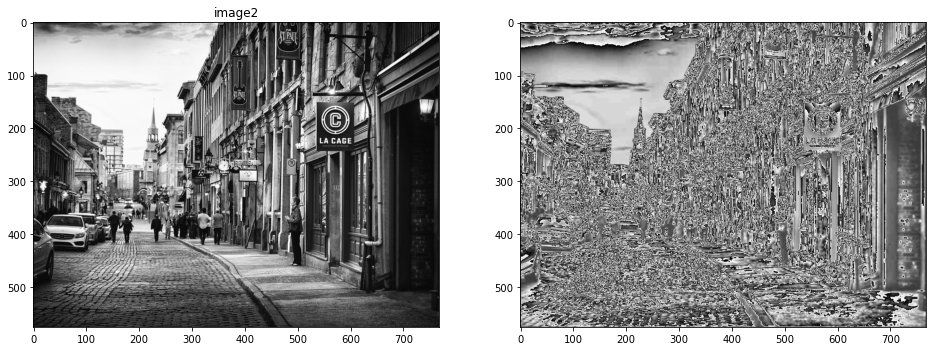

array([[124, 247, 250, ...,  81,  72,  30],
       [193, 129, 132, ..., 123, 109,  46],
       [206, 154, 157, ..., 123, 106,  46],
       ...,
       [ 53, 109, 118, ..., 112, 113,  56],
       [ 45,  94, 111, ..., 115, 121,  60],
       [ 27,  57,  66, ...,  79,  84,  42]], dtype=uint8)

In [6]:
kernel=np.array([[1, 0, 1], [1, 0, 1], [1, 0,1]])
image_edge3=input_image
image_edge3=convolution2d_(image_edge3,kernel,bias)
plot_image(input_image,image_edge3)
image_edge3

100%|████████████████████████████████████████| 576/576 [00:10<00:00, 53.51it/s]


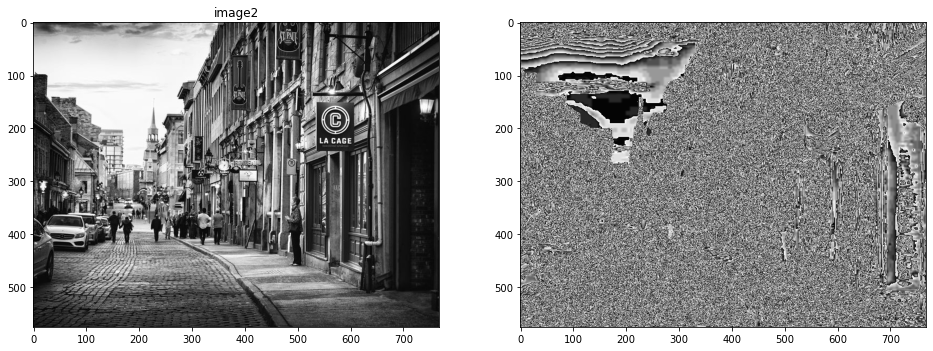

array([[120, 187, 241, ..., 153,  24, 181],
       [ 18,  38,  37, ..., 143, 193,  31],
       [221,  85, 184, ..., 215, 244,  55],
       ...,
       [ 98,  31, 232, ..., 194,   1,  91],
       [  4, 164,  88, ..., 119, 208,  62],
       [151, 249, 104, ..., 145,  40, 205]], dtype=uint8)

In [7]:
image_edge3=convolution2d_(image_edge3,kernel,bias)
plot_image(input_image,image_edge3)
image_edge3

## Blur

In [8]:
# kernel to be used for box blur
kernel=np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9.0
imageboxblur=input_image

100%|████████████████████████████████████████| 576/576 [00:09<00:00, 60.03it/s]


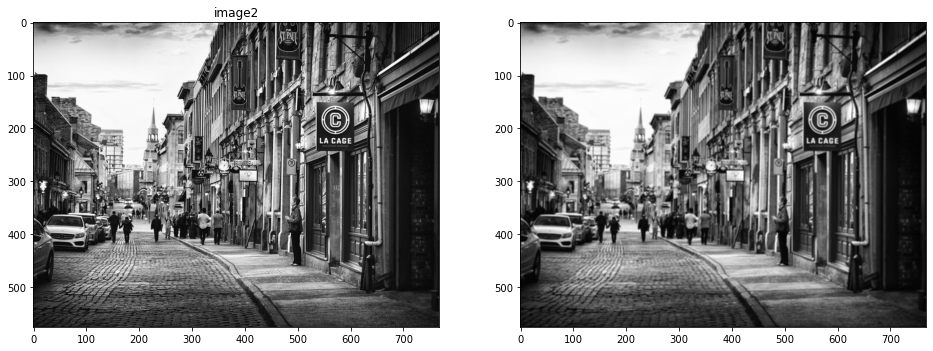

In [9]:
imageboxblur=convolution2d_(imageboxblur,kernel,bias)
plot_image(input_image,imageboxblur)

100%|████████████████████████████████████████| 576/576 [00:09<00:00, 60.20it/s]


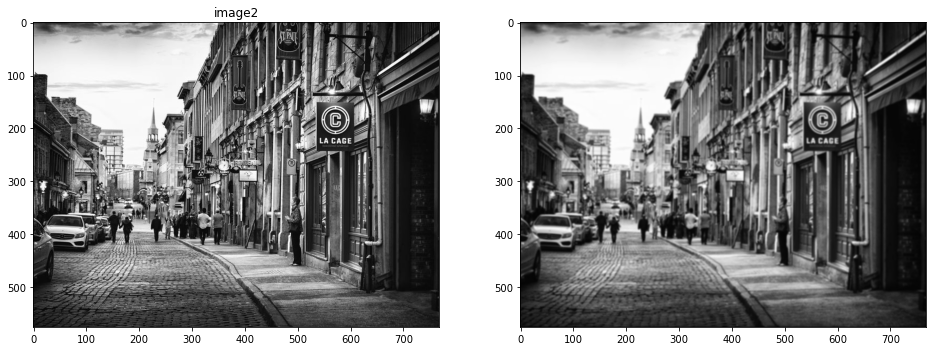

In [10]:
imageboxblur=convolution2d_(imageboxblur,kernel,bias)
plot_image(input_image,imageboxblur)

In [11]:
# kernel to be used for gaussian blur
kernel=np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])/16.0
imagegaussianblur =input_image


100%|████████████████████████████████████████| 576/576 [00:12<00:00, 47.93it/s]


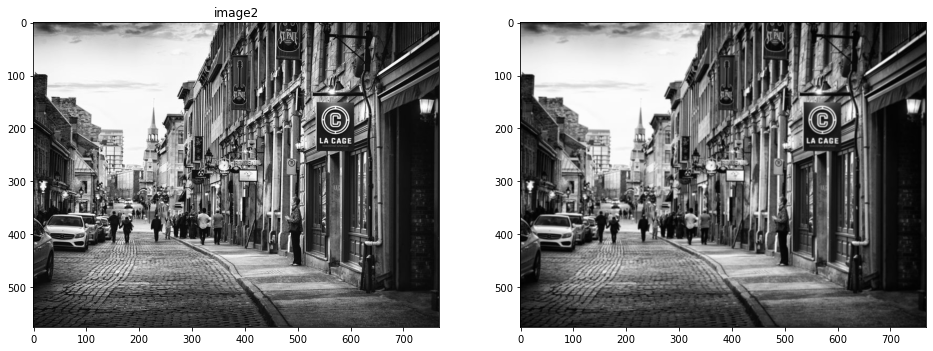

In [12]:
imagegaussianblur =convolution2d_(imagegaussianblur,kernel,bias)
plot_image(input_image,imagegaussianblur )

100%|████████████████████████████████████████| 576/576 [00:10<00:00, 53.17it/s]


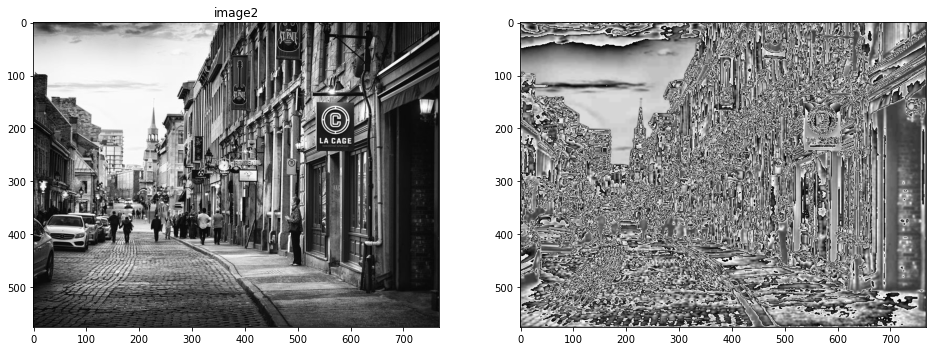

array([[109, 192, 219, ...,  69,  54,  28],
       [177,  55,  99, ..., 109,  85,  44],
       [206, 105, 156, ..., 118,  91,  47],
       ...,
       [ 57, 100, 121, ..., 112,  97,  56],
       [ 42,  77, 100, ..., 104,  92,  54],
       [ 24,  45,  59, ...,  68,  60,  36]], dtype=uint8)

In [13]:
#kernel=np.array([[-1, 0, 1], [0, 0, 0], [1, 0, -1]])
kernel=np.array([[1, 0, 1], [1, 0, 1], [1, 0,1]])
image_edge2=imagegaussianblur
image_edge2=convolution2d_(image_edge2,kernel,bias)
plot_image(input_image,image_edge2)
image_edge2

100%|████████████████████████████████████████| 576/576 [00:09<00:00, 58.14it/s]


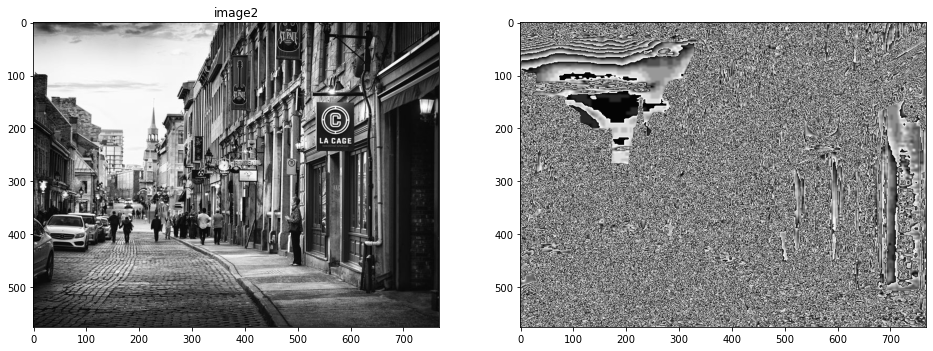

array([[247,  92,  52, ...,  75, 250, 139],
       [ 96, 198,  55, ...,  40, 159, 230],
       [ 48,  43, 239, ..., 125, 219,   5],
       ...,
       [ 45,  17, 158, ..., 125, 240,  31],
       [222, 147,  21, ...,  30, 174, 249],
       [122, 225,  49, ...,  71,   6, 152]], dtype=uint8)

In [14]:
image_edge2=convolution2d_(image_edge2,kernel,bias)
plot_image(input_image,image_edge2)
image_edge2